In [1]:
import sys
sys.path.append("..")

from src.data.datasets.melody_dataset import MelodyDataset
from src.data.loaders.melody_loader import get_dataloader

In [2]:
train_dataset = MelodyDataset.from_path("..\\datasets\\melody_extraction\\processed\\train")

Slicing audio and melody: 100%|██████████| 103/103 [00:06<00:00, 16.06it/s]


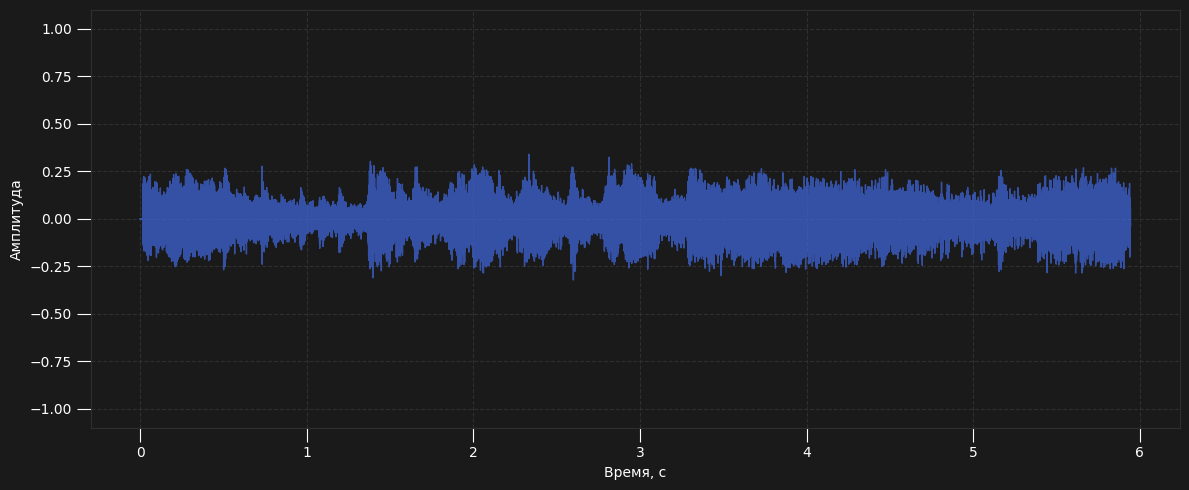

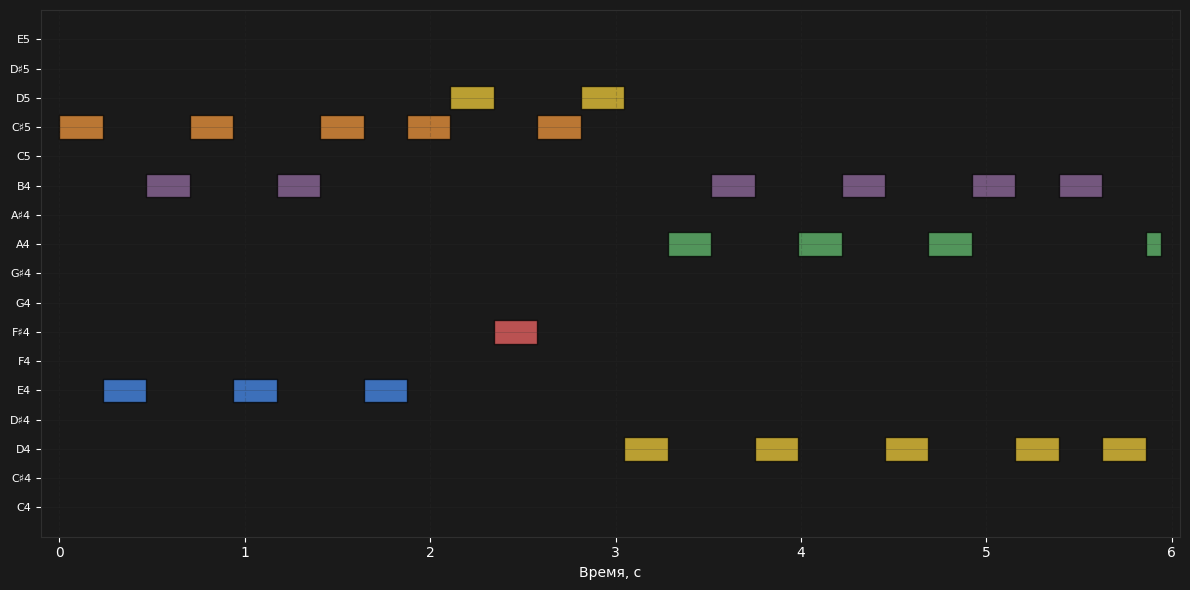

Длительность аудио: 5.944308390022676
Длительность мелодии: 5.944308390022676


In [3]:
idx = 0

audio = train_dataset.sliced_audio[idx]
melody = train_dataset.sliced_melody[idx]

audio.visualize()
melody.visualize()

print(f"Длительность аудио: {audio.duration}")
print(f"Длительность мелодии: {melody.duration}")

In [4]:
train_loader = get_dataloader(train_dataset, batch_size=32, num_workers=0, shuffle=False)
data = next(iter(train_loader))

spectrograms = data[0]
offsets = data[1]
durations = data[2]
len_seqs = data[3]

In [5]:
spectrograms.shape

torch.Size([32, 1, 128, 257])

In [6]:
offsets.shape

torch.Size([32, 39])

In [7]:
len_seqs.shape

torch.Size([32, 1])

In [8]:
offsets[idx]

tensor([   0.9597,    0.9395,    0.9552,    0.9597,    0.9395,    0.9552,
           0.9597,    0.9395,    0.9597,    0.9619,    0.9440,    0.9597,
           0.9619,    0.9350,    0.9507,    0.9552,    0.9350,    0.9507,
           0.9552,    0.9350,    0.9507,    0.9552,    0.9350,    0.9552,
           0.9350,    0.9507, -100.0000, -100.0000, -100.0000, -100.0000,
        -100.0000, -100.0000, -100.0000, -100.0000, -100.0000, -100.0000,
        -100.0000, -100.0000, -100.0000])

In [9]:
durations[idx]

tensor([ 4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,
         4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,
         4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,
         4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,
         4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,  4.9019e-02,
         1.7105e-02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02])

In [10]:
len_seqs

tensor([[0.5000],
        [0.5208],
        [0.5000],
        [0.5000],
        [0.2708],
        [0.1667],
        [0.1875],
        [0.2708],
        [0.3125],
        [0.2708],
        [0.1667],
        [0.2292],
        [0.3542],
        [0.3125],
        [0.2917],
        [0.2917],
        [0.2708],
        [0.3542],
        [0.3333],
        [0.3333],
        [0.2917],
        [0.2708],
        [0.4583],
        [0.2917],
        [0.2083],
        [0.1042],
        [0.7708],
        [0.5625],
        [0.4583],
        [0.6667],
        [0.6667],
        [0.7500]])

In [12]:
from src.nn.models.MelodyNet import MelodyNet

model = MelodyNet()

offsets, durations = model.predict(spectrograms)

In [13]:
offsets.shape

torch.Size([32, 3])

In [14]:
offsets

tensor([[   0.2841,   -0.9390, -100.0000],
        [   0.1731,   -0.8406, -100.0000],
        [   0.4534,   -0.7484, -100.0000],
        [   0.7226,   -0.6582, -100.0000],
        [   0.8695,   -0.8163, -100.0000],
        [   0.4104,   -0.7796, -100.0000],
        [   0.2006,   -1.2030, -100.0000],
        [   0.1743,   -1.3203, -100.0000],
        [   0.1878,   -0.6835, -100.0000],
        [   0.1353,   -1.4457, -100.0000],
        [   0.1831,   -1.3683, -100.0000],
        [   0.4458,   -0.4592, -100.0000],
        [   0.6231,   -0.9618, -100.0000],
        [   0.1037,   -0.9502, -100.0000],
        [   0.5871,   -0.9641, -100.0000],
        [   0.5930,   -1.0451, -100.0000],
        [   1.0715,   -0.6402, -100.0000],
        [   0.5081,   -1.0841, -100.0000],
        [   0.3427,   -0.7169, -100.0000],
        [   0.6361,   -0.9531, -100.0000],
        [   0.3472,   -0.3537, -100.0000],
        [   0.3141,   -0.8902, -100.0000],
        [  -0.1993,   -0.2906,   -0.9825],
        [  

In [15]:
durations.shape

torch.Size([32, 3])

In [16]:
durations

tensor([[ 7.7425e-02, -2.4704e-01, -1.0000e+02],
        [ 1.0962e-01, -4.8559e-02, -1.0000e+02],
        [ 1.7067e-01, -1.4086e-01, -1.0000e+02],
        [ 1.3457e-01, -1.1359e-01, -1.0000e+02],
        [ 8.8004e-02, -2.1886e-01, -1.0000e+02],
        [ 3.0003e-02, -1.7447e-01, -1.0000e+02],
        [ 6.2513e-03, -2.4402e-01, -1.0000e+02],
        [ 1.1209e-01, -2.0628e-01, -1.0000e+02],
        [ 1.7095e-02, -1.2458e-02, -1.0000e+02],
        [-5.7845e-02, -2.0043e-01, -1.0000e+02],
        [ 9.0085e-02, -1.5325e-01, -1.0000e+02],
        [-3.2109e-02, -2.5276e-01, -1.0000e+02],
        [ 5.7165e-02, -1.1433e-01, -1.0000e+02],
        [ 3.7079e-02, -1.4641e-01, -1.0000e+02],
        [ 6.1202e-02, -1.8535e-01, -1.0000e+02],
        [ 1.7301e-01, -1.4369e-01, -1.0000e+02],
        [ 1.5705e-01, -1.3950e-01, -1.0000e+02],
        [ 9.5455e-02, -1.5701e-01, -1.0000e+02],
        [ 9.8577e-02, -3.4749e-01, -1.0000e+02],
        [ 7.2437e-02, -1.8613e-01, -1.0000e+02],
        [ 3.1925e-02

In [17]:
len_seqs.shape

torch.Size([32, 1])

In [18]:
len_seqs

tensor([[-0.0272],
        [-0.0189],
        [-0.0268],
        [-0.0288],
        [-0.0241],
        [-0.0292],
        [-0.0188],
        [-0.0177],
        [-0.0292],
        [-0.0283],
        [-0.0212],
        [-0.0222],
        [-0.0238],
        [-0.0127],
        [-0.0286],
        [-0.0270],
        [-0.0220],
        [-0.0238],
        [-0.0114],
        [-0.0380],
        [-0.0290],
        [-0.0313],
        [-0.0350],
        [-0.0207],
        [-0.0265],
        [-0.0268],
        [-0.0377],
        [-0.0291],
        [-0.0137],
        [-0.0295],
        [-0.0285],
        [-0.0288]], grad_fn=<AddmmBackward0>)